<a href="https://colab.research.google.com/github/LordGarmadon/Tugas-Python/blob/main/Final_Project_Python_M_Azaria_Widyadhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muhammad Azaria Widyadhana (1101194425) TT-43-INT**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def cos(freq,type,ht,hr,d):
  #freq = frequency (MHz)
  #type = urban, suburban, open
  #ht = tower height (meter)
  #hr = user height (meter)
  #d = distance (meter)
    if freq in range(150,1501):
        Ca=69.55
        Cb=26.16
    elif freq in range(1501,2001):
        Ca=46.3
        Cb=33.9
    
    if type=='urban' :
        Cm=0
    elif type=='suburban' :
        Cm= -2*((np.log10((freq/28)**2))-5.4)
    elif type=='open' :
        Cm= -4.78*(np.log10(freq))+18.33*(np.log10(freq))-40.94
    else :
        Cm='wrong type'
    
    ahr = (1.1*np.log10(freq)-0.7)*hr-(1.56*np.log10(freq)-1.8)
    Lp = Ca+(Cb*np.log10(freq))-(13.83*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm
    
    return Lp

In [ ]:
dmin=300 #m
dmax=1000 #m
N=200 #number of node
d=np.random.randint(dmin,dmax,N)

f=1800 #MHz
locur="urban"
locsur="suburban"
locop="open"
tower=80 #m
user=1.5 #m

f1=700 #MHz
f2=900 #MHz
f3=1800 #MHz

In [ ]:
LpUrban=cos(f,locur,tower,user,d)
LpSubUrban=cos(f,locsur,tower,user,d)
LpOpen=cos(f,locop,tower,user,d)

In [ ]:
Lpf1=cos(f1,locur,tower,user,d)
Lpf2=cos(f2,locur,tower,user,d)
Lpf3=cos(f3,locur,tower,user,d)

**Recieve Strength**

In [ ]:
def prx(ptx,pl,gtx,grx):
  plogtx=10*(np.log10(ptx))-pl+gtx+grx #ptx is changed from mW to dBm then sum all with another Db
  pnumrx=10**(plogtx/10) #the value result is going back to mW
  return pnumrx

In [ ]:
ptx = 30*10**3 #mW
gtx = 10 #dB
grx = 2 #dB

#PRx Area
prxUrban = prx(ptx,LpUrban,gtx,grx)
prxSubUrban = prx(ptx,LpSubUrban,gtx,grx)
prxOpen = prx(ptx,LpOpen,gtx,grx)

#PRx Freq
prxf1 = prx(ptx,Lpf1,gtx,grx)
prxf2 = prx(ptx,Lpf2,gtx,grx)
prxf3 = prx(ptx,Lpf3,gtx,grx)

In [ ]:
d_sort = d[np.argsort(d)]
prxUrban_sort=prxUrban[np.argsort(d)]
prxSub_Urban_sort=prxSubUrban[np.argsort(d)]
prxOpen_sort=prxOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
prxf1_sort=prxf1[np.argsort(d)]
prxf2_sort=prxf2[np.argsort(d)]
prxf3_sort=prxf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

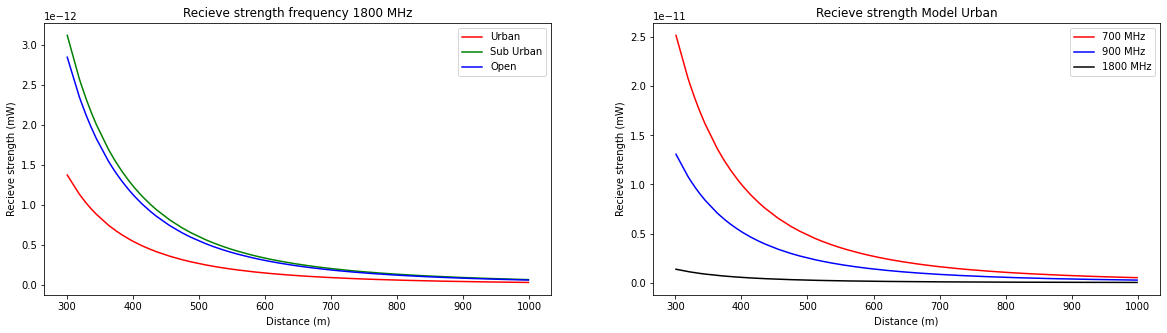

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Recieve strength frequency 1800 MHz")
sb1.plot(d_sort,prxUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,prxSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,prxOpen_sort, 'b',label='Open')
sb1.set_xlabel('Distance (m)')
sb1.set_ylabel('Recieve strength (mW)')
sb1.legend()

sb2.set_title("Recieve strength Model Urban")
sb2.plot(d_sort,prxf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,prxf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,prxf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Distance (m)')
sb2.set_ylabel('Recieve strength (mW)')
sb2.legend()

plt.show()

**Signal to Noise Ratio**

In [ ]:
def snr(bw,pnumrx):
  noilog=-174+10*np.log10(bw) #noise is changed from numeric to logarithmic
  noinum=10**(noilog/10) #noise is changed logarithmic ke numeric
  snr=pnumrx/noinum
  return snr

In [ ]:
bw = 5*10**6 #Hz

#SNR Area
snrUrban = snr(bw,prxUrban)
snrSubUrban = snr(bw,prxSubUrban)
snrOpen = snr(bw,prxOpen)

#SNR Freq
snrf1 = snr(bw,prxf1)
snrf2 = snr(bw,prxf2)
snrf3 = snr(bw,prxf3)

In [ ]:
d_sort = d[np.argsort(d)]
snrUrban_sort=snrUrban[np.argsort(d)]
snrSub_Urban_sort=snrSubUrban[np.argsort(d)]
snrOpen_sort=snrOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
snrf1_sort=snrf1[np.argsort(d)]
snrf2_sort=snrf2[np.argsort(d)]
snrf3_sort=snrf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

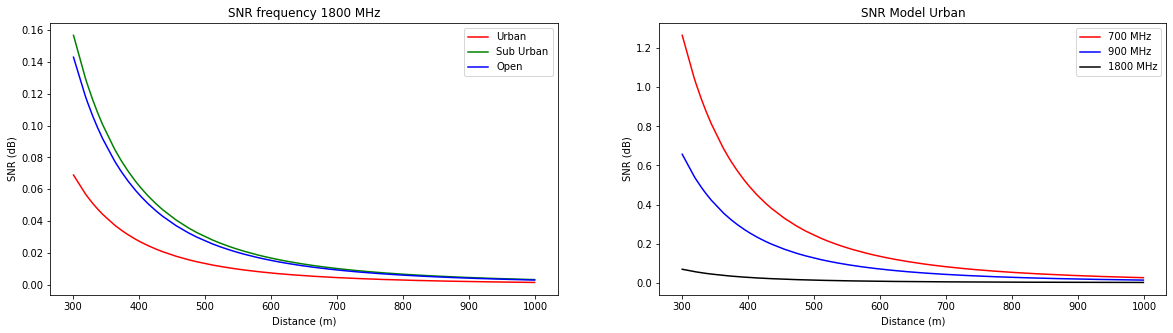

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("SNR frequency 1800 MHz")
sb1.plot(d_sort,snrUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,snrSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,snrOpen_sort, 'b',label='Open')
sb1.set_xlabel('Distance (m)')
sb1.set_ylabel('SNR (dB)')
sb1.legend()

sb2.set_title("SNR Model Urban")
sb2.plot(d_sort,snrf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,snrf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,snrf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Distance (m)')
sb2.set_ylabel('SNR (dB)')
sb2.legend()

plt.show()

**Cellular Capacity**

In [ ]:
def cell(snr,bw):
  sell=bw*np.log2(1+snr)
  return sell

In [ ]:
bw = 5*10**6 #Hz

#SNR Area
cellUrban = cell(bw,snrUrban)
cellSubUrban = cell(bw,snrSubUrban)
cellOpen = cell(bw,snrOpen)

#SNR Freq
cellf1 = cell(bw,snrf1)
cellf2 = cell(bw,snrf2)
cellf3 = cell(bw,snrf3)

In [ ]:
d_sort = d[np.argsort(d)]
cellUrban_sort=cellUrban[np.argsort(d)]
cellSub_Urban_sort=cellSubUrban[np.argsort(d)]
cellOpen_sort=cellOpen[np.argsort(d)]

d_sort = d[np.argsort(d)]
cellf1_sort=cellf1[np.argsort(d)]
cellf2_sort=cellf2[np.argsort(d)]
cellf3_sort=cellf3[np.argsort(d)]

<Figure size 432x288 with 0 Axes>

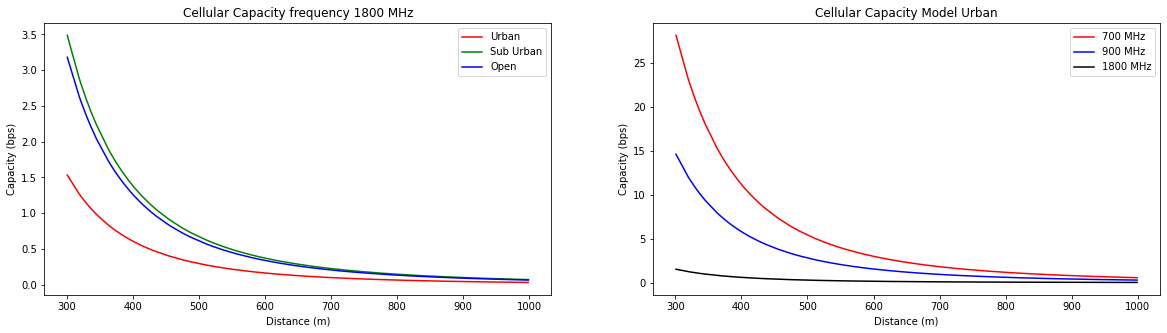

In [ ]:
plt.figure()
fig,(sb1,sb2) = plt.subplots(nrows=1,ncols=2, figsize=(20,5))

sb1.set_title("Cellular Capacity frequency 1800 MHz")
sb1.plot(d_sort,cellUrban_sort, 'r', label='Urban')
sb1.plot(d_sort,cellSub_Urban_sort,'g', label='Sub Urban')
sb1.plot(d_sort,cellOpen_sort, 'b',label='Open')
sb1.set_xlabel('Distance (m)')
sb1.set_ylabel('Capacity (bps)')
sb1.legend()

sb2.set_title("Cellular Capacity Model Urban")
sb2.plot(d_sort,cellf1_sort, 'r', label="700 MHz")
sb2.plot(d_sort,cellf2_sort, 'b',label="900 MHz")
sb2.plot(d_sort,cellf3_sort, 'k', label="1800 MHz")
sb2.set_xlabel('Distance (m)')
sb2.set_ylabel('Capacity (bps)')
sb2.legend()

plt.show()